# Анализ сервиса аренды самокатов GoFast

Цель данного исследования - поиск рекомендаций для роста бизнеса аренды самокатов. <br>
Сервисом пользуется две группы пользователей - с подпиской и без подписки. Для них различаются тарифы. <br>
Задачей исследования является сравнение показателей двух групп пользователей и разработка стратегии развития бизнеса.

Основные задачи:<br>
    1. Знакомство с данными. Общий обзор, предварительное знакомство с типами данных, наличием пропусков.<br>
    2. Предварительная обработка данных.<br>
        2.1 Поиск пропусков, заполнение пропусков приемлемыми данными, где это возможно.<br>
        2.2 Поиск и удаление явных дубликатов.<br>
        2.3 Преобразование типов данных, где это необходимо.<br>
    3. Проведение исследовательского анализа данных.<br>
        3.1 Изучение портрета пользователя - город проживания, возраст, наличие подписки, длительность и дальность поездки (построение таблиц и графиков по каждому параметру).<br>
    4. Подготовка и дополнительная обработка данных для последующего статистического анализа - объединение данных в один датасет, сравнение длительности и дальности поездок для пользоателей с подпиской и без.<br>
    5. Расчёт помесячной выручки для каждого пользователя.<br>
    6. Статистический анализ данных. Проверка гипотез.<br>
        6.1 Гипотеза о том, что пользователи с подпиской тратят больше времени на поездки. <br>
        6.2 Гипотеза о том, что среднее расстояние поездок пользователей с подпиской превышает оптимальное расстояние поездки самоката. <br>
        6.3 Гипотеза о том, что месячная выручка от пользователей с подпиской выше такой же выручки от пользователей без подписки.<br>
    7. Разработка рекомендаций с помощью распределений. Поиск оптимальных решений.<br>
        7.1 Поиск оптимального количества промокодов для получения 100 пользователей с подпиской.<br>
        7.2 Расчёт вероятности получения необходимого количества открытий push-уведомлений.<br>
    8. Выводы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

## Обзор данных

### Шаг 1. Загрузка данных

In [2]:
try:
    users = pd.read_csv('C:/Users/Azerty/Downloads/users_go.csv')
    rides = pd.read_csv('C:/Users/Azerty/Downloads/rides_go.csv', parse_dates=['date'])
    subscriptions = pd.read_csv('C:/Users/Azerty/Downloads/subscriptions_go.csv')
except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
#     rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', parse_dates=['date'], dayfirst=True)
    rides = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'])
    subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [3]:
def display_info(data):
    display(data.head(10))
    display(data.info())

In [4]:
display_info(users)
display_info(rides)
display_info(subscriptions)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


None

По результатм первоначального обзора данных можно сделать о вывод о достаточно хорошем качестве данных - отстутствуют пропуски. Однако необходимо провести предварительную обработку данных, чтобы получить более полную информацию и привести при необходимости данные к нужному формату.

### Шаг 2. Предобработка данных

Проверим датасеты на наличие пропусков.

In [5]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [6]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [7]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Проверим датасеты на наличие явных дубликатов.

In [8]:
display(users.duplicated().sum())
display(rides.duplicated().sum())
display(subscriptions.duplicated().sum())

31

0

0

Удалим явные дубликаты.

In [9]:
users = users.drop_duplicates()
users.duplicated().sum()

0

Добавим новый столбец с номером месяца.

In [10]:
rides['month'] = pd.DatetimeIndex(rides['date']).month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [11]:
rides['year'] = pd.DatetimeIndex(rides['date']).year
rides['year'].unique()

array([2021])

#### Шаг 3. Исследовательский анализ данных

Рассмотрим различные параметры имеющихся у нас данных.

Проанализируем встречаемость городов среди пользователей сервиса.

In [12]:
users_pivot_cities = users.pivot_table(index='city', values='user_id', aggfunc='count')
users_pivot_cities.columns=['count']
users_pivot_cities

,count
city,
Екатеринбург,204
Краснодар,193
Москва,168
Омск,183
Пятигорск,219
Ростов-на-Дону,198
Сочи,189
Тюмень,180


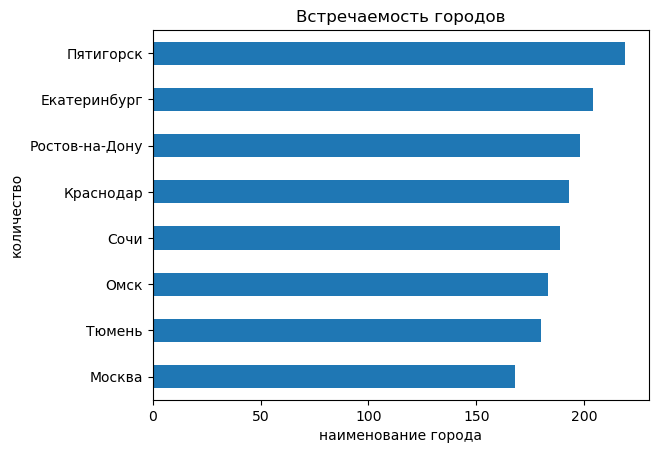

In [13]:
users_pivot_cities.sort_values(by='count').plot(kind='barh')
plt.title('Встречаемость городов')
plt.xlabel('наименование города')
plt.ylabel('количество')
plt.legend().set_visible(False);

Проанализируем соотношение пользователей с подпиской и без.

In [14]:
users_pivot_sub_type = users.pivot_table(index='subscription_type', values='city', aggfunc='count')
users_pivot_sub_type.columns = ['count']
total = users_pivot_sub_type['count'].sum()
users_pivot_sub_type['ratio'] = users_pivot_sub_type['count'] / total *100
users_pivot_sub_type

,count,ratio
subscription_type,,
free,835,54.432855
ultra,699,45.567145


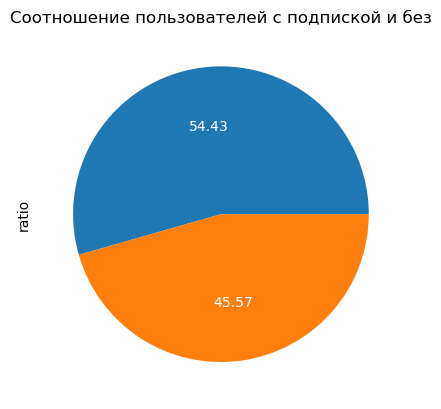

In [15]:
users_pivot_sub_type.plot(kind='pie', y = 'ratio', autopct = '%.2f', textprops=dict(color='w'))
plt.title('Соотношение пользователей с подпиской и без')
plt.legend().set_visible(False);

Проанализируем распределение пользователей по возрастам.

In [16]:
users_pivot_age = users.pivot_table(index='age', values='city', aggfunc='count')
users_pivot_age.columns = ['count']
total_count = users_pivot_age['count'].sum()
users_pivot_age['ratio'] = users_pivot_age['count'] / total_count *100
users_pivot_age.head(10)

,count,ratio
age,,
12,4,0.260756
13,8,0.521512
14,9,0.586701
15,13,0.847458
16,19,1.238592
17,26,1.694915
18,46,2.998696
19,47,3.063885
20,71,4.628422


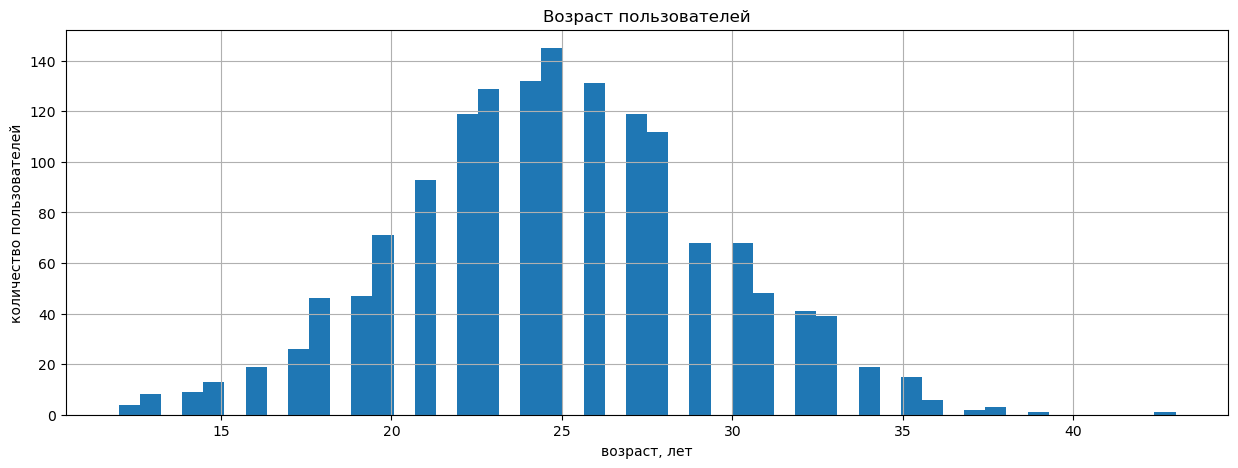

In [17]:
users.hist(bins=50, column='age', figsize=(15, 5))
plt.title('Возраст пользователей')
plt.xlabel('возраст, лет')
plt.ylabel('количество пользователей');

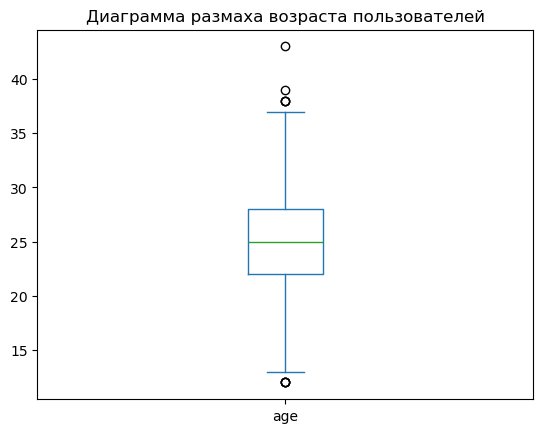

In [18]:
users['age'].plot.box()
plt.title('Диаграмма размаха возраста пользователей');

In [19]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Судя по данным диаграммы размаха значения возраста менее 13 лет и более 33 лет являются статистическими выбросами. Судя по графику это единичные значения, которые скорее всего не повлияют на результаты анализа при удалении.

Проанализируем дальность поездок.

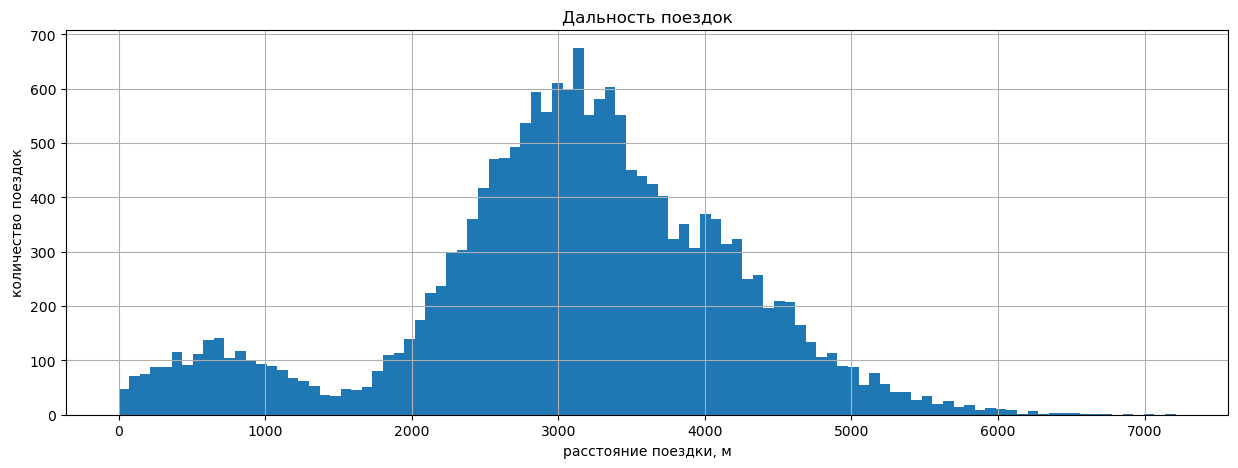

In [20]:
rides['distance'].hist(bins=100, figsize=(15, 5))
plt.title('Дальность поездок')
plt.xlabel('расстояние поездки, м')
plt.ylabel('количество поездок');

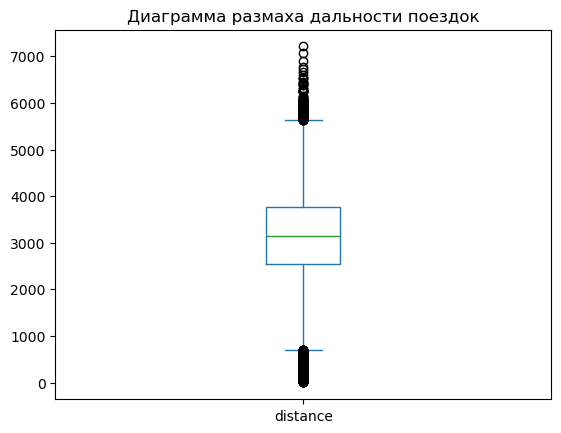

In [21]:
rides['distance'].plot.box()
plt.title('Диаграмма размаха дальности поездок');

In [22]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Судя по данным диаграммы размаха поездки дальностью менее ~ 600 м и более ~ 5500 м должны являться статистическими выбросами. Хотя таких значений судя по графику достаточно много и их удаление может исказить результаты анализа данных, поэтому не стоит ими пренебрегать.

Предположу, что короткие поездки чаще совершают пользователи без подписки для каких-то разовых коротких поездок, возможно, просто, чтобы поробовать сервис. <br>
Пользователи с подпиской очевидно используют самокаты регулярно, возможно на одних и тех же маршрутоах, например, чтобы добраться до работы, поэтому их маршруты скорее всего не такие короткие. <br>
Проанализировать поведение разных групп попробуем после объединения данных.

Проанализируем длительность поездок.

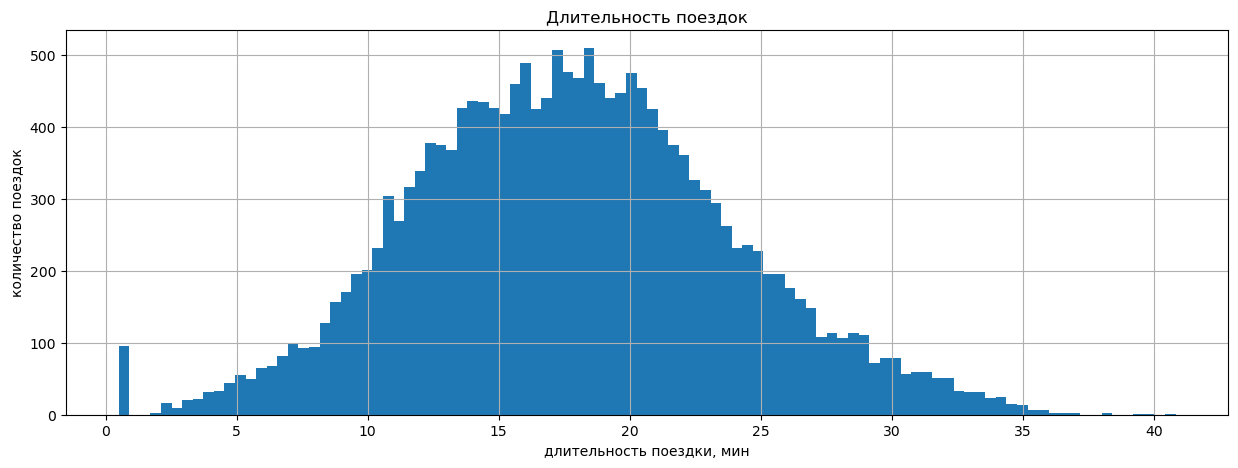

In [23]:
rides['duration'].hist(bins=100, figsize=(15, 5))
plt.title('Длительность поездок')
plt.xlabel('длительность поездки, мин')
plt.ylabel('количество поездок');

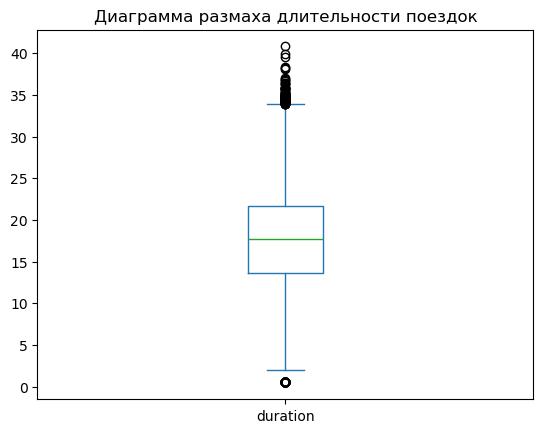

In [24]:
rides['duration'].plot.box()
plt.title('Диаграмма размаха длительности поездок');

In [25]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Судя по диаграмме размаха имеются единичные выбросы по длительности поездок со временем менее 3 минут. Этими данными ожно пренебречь при анализе данных. <br>
Также имеются значения за пределами максимального значения, которые могут считаться выбросами, однако их количество достаточно большое, что не позволяет пренебречь этими данными. Скорее всего есть какая-то причина таких данных.

Результаты исследовательского анализа данных позволяют увидеть общую картину по имеющимся данным. <br>
Возраст пользователей, дальность и длительность поездок в целом имеют нормальное распределение. <br>
Межквартильный размах по параметрам составляет: <br>
    возраст - 22-28 лет, <br>
    дальность поездок - 2543-3776 м,<br>
    длительность поездок - 13,6-21,7 мин.<br>
Однако в каждой категории данных имеются выбросы.<br>
Часть этих выбросов можно исключить из дальнейшего анализа, так как это единичные значения, которые не повлияют на результаты анализа. <br>
Однако часть выбросов стоит учесть при анализе, так как количество таких значений достаточно большое.

### Шаг 4. Объединение данных

Объединим все имеющиеся у нас данные для удобства использования и проведения необходимых расчётов.

In [26]:
users_rides = users.merge(rides, on='user_id', how='inner')
users_rides.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,year
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021


In [27]:
users_rides_sub = users_rides.merge(subscriptions, on='subscription_type', how='inner')
users_rides_sub.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199


In [28]:
users_rides.info()
users_rides_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   year               18068 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(3)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Nul

Объединение данных прошло корректно. Количество строк в датасете до и после объединения совпадает. Пропуски отсутствуют. Значит, никакие данные при объединении не были утрачены.

Проанализируем данные о пользователях с подпиской и без.

In [29]:
users_sub_ultra = users_rides_sub[users_rides_sub['subscription_type'] == 'ultra']
users_sub_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199


In [30]:
users_sub_free = users_rides_sub[users_rides_sub['subscription_type'] == 'free']
users_sub_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,2021,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,2021,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,2021,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,2021,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,2021,8,50,0


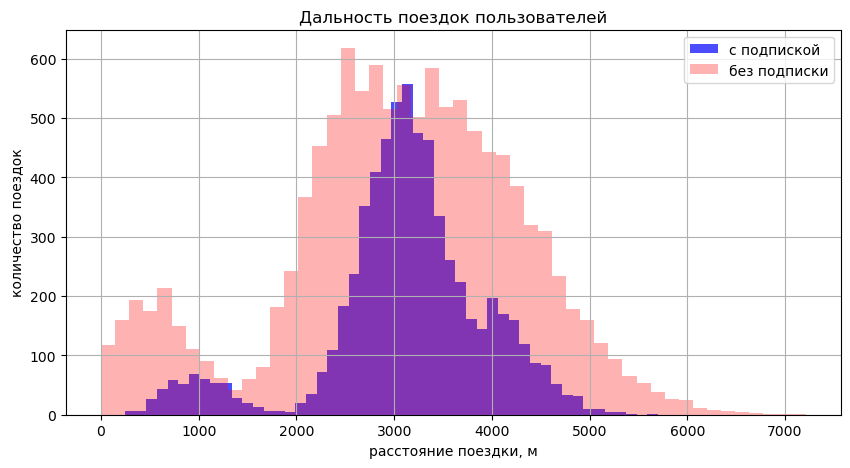

In [31]:
users_sub_ultra['distance'].hist(bins=50, figsize=(10, 5), alpha=0.7, color='blue', label='с подпиской')
users_sub_free['distance'].hist(bins=50, figsize=(10, 5), alpha=0.3, color='red', label='без подписки')
plt.title('Дальность поездок пользователей')
plt.xlabel('расстояние поездки, м')
plt.ylabel('количество поездок')
plt.legend();

In [32]:
display(users_sub_ultra['distance'].describe())
users_sub_free['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

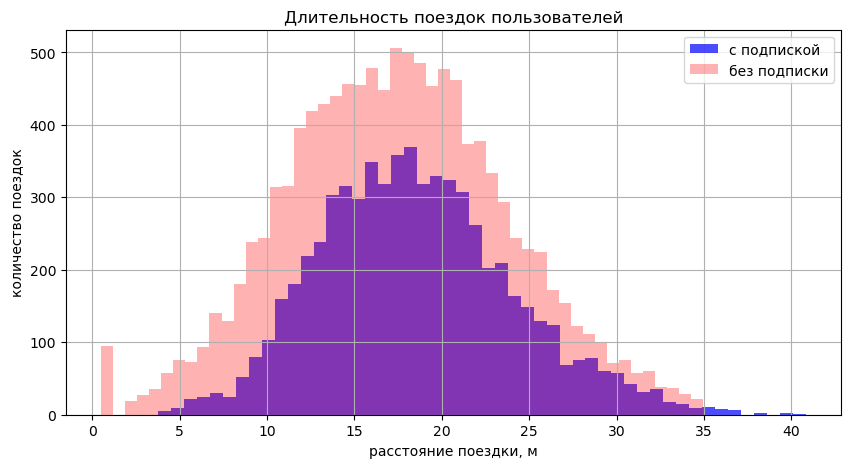

In [33]:
users_sub_ultra['duration'].hist(bins=50, figsize=(10, 5), alpha=0.7, color='blue', label='с подпиской')
users_sub_free['duration'].hist(bins=50, figsize=(10, 5), alpha=0.3, color='red', label='без подписки')
plt.title('Длительность поездок пользователей')
plt.xlabel('расстояние поездки, м')
plt.ylabel('количество поездок')
plt.legend();

In [34]:
display(users_sub_ultra['duration'].describe())
users_sub_free['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

По данным видно, что количество поездок, совершаемое пользователями без подписки, вдвое превышает количество поездок пользователей с подпиской. <br>
При этом средние дальность и длительность поездок пользователей с подпиской превышают аналогичные параметры для пользователей без подписки.

### Шаг 5. Подсчёт выручки

Подсчитаем выручку, принесённую сервису различными пользователями.

Сначала округлим продолжительность каждой поездки до ближайшего большего целого числа.

In [35]:
users_rides_sub['duration'] = np.ceil(users_rides_sub['duration'])

Рассчитаем количество, суммарные длительность и дальность поездок для каждого пользователя помесячно.

In [36]:
agg_func = {\
'distance' : ['count', 'sum'],\
'duration' : 'sum'}
users_m = users_rides_sub.groupby(\
['user_id', 'subscription_fee', 'minute_price', 'start_ride_price', 'month'])\
.agg(agg_func)
users_m.columns=['count', 'distance', 'duration']
users_m.head()

count  \
user_id subscription_fee minute_price start_ride_price month          
1       199              6            0                1          2   
                                                       4          1   
                                                       8          2   
                                                       10         2   
                                                       11         3   

                                                                 distance  \
user_id subscription_fee minute_price start_ride_price month                
1       199              6            0                1      7027.511294   
                                                       4       754.159807   
                                                       8      6723.470560   
                                                       10     5809.911100   
                                                       11     7003.499363   

                                                              duration  
user_id subscription_fee minute_price start_ride_price month            
1       199              6            0                1          42.0  
                                                       4           7.0  
                                                       8          46.0  
                                                       10         32.0  
                                                       11         56.0

In [37]:
users_m.isna().sum()

count       0
distance    0
duration    0
dtype: int64

Объединенные данные содержат такое же количество строк, что и исходные. Пропуски отсутствуют. Объединение данных прошло корректно.

Рассчитаем выручку помесячную выручку для каждого пользователя.

In [38]:
users_m = users_rides_sub.groupby(\
['user_id', 'subscription_fee', 'minute_price', 'start_ride_price', 'month'], as_index=False)\
.agg(agg_func)
users_m.columns = ['user_id', 'subscription_fee', 'minute_price', 'start_ride_price', 'month', 'count', 'distance', 'duration']
users_m.head()

,user_id,subscription_fee,minute_price,start_ride_price,month,count,distance,duration
0,1,199,6,0,1,2,7027.511294,42.0
1,1,199,6,0,4,1,754.159807,7.0
2,1,199,6,0,8,2,6723.470560,46.0
3,1,199,6,0,10,2,5809.911100,32.0
4,1,199,6,0,11,3,7003.499363,56.0


In [39]:
users_m['proceeds'] = users_m['count'] * users_m['start_ride_price'] \
+ users_m['duration'] * users_m['minute_price']\
+ users_m['subscription_fee']
users_m.head()

,user_id,subscription_fee,minute_price,start_ride_price,month,count,distance,duration,proceeds
0,1,199,6,0,1,2,7027.511294,42.0,451.0
1,1,199,6,0,4,1,754.159807,7.0,241.0
2,1,199,6,0,8,2,6723.470560,46.0,475.0
3,1,199,6,0,10,2,5809.911100,32.0,391.0
4,1,199,6,0,11,3,7003.499363,56.0,535.0


In [40]:
users_proceeds = users_m.pivot_table(index=['user_id', 'subscription_fee'], values='proceeds', aggfunc=['mean', 'sum'])
users_proceeds.columns = ['mean_proceeds', 'total_proceeds']
users_proceeds.head()

,,mean_proceeds,total_proceeds
user_id,subscription_fee,,
1,199,410.000000,2460.0
2,199,373.000000,2611.0
3,199,403.857143,2827.0
4,199,492.000000,2952.0
5,199,334.000000,2672.0


In [41]:
mean_ultra_proceeds = users_m[users_m['subscription_fee'] == 199]['proceeds'].mean()
total_ultra_proceeds = users_m[users_m['subscription_fee'] == 199]['proceeds'].sum()
display('Средняя месячная выручка пользователей с подпиской:', mean_ultra_proceeds)
display('Общая годовая выручка пользователей с подпиской:', total_ultra_proceeds)

'Средняя месячная выручка пользователей с подпиской:'

362.7921906022502

'Общая годовая выручка пользователей с подпиской:'

1644537.0

In [42]:
mean_free_proceeds = users_m[users_m['subscription_fee'] == 0]['proceeds'].mean()
total_free_proceeds = users_m[users_m['subscription_fee'] == 0]['proceeds'].sum()
display('Средняя месячная выручка пользователей без подписки:', mean_free_proceeds)
display('Общая годовая выручка пользователей без подписки:', total_free_proceeds)

'Средняя месячная выручка пользователей без подписки:'

328.6413651073845

'Общая годовая выручка пользователей без подписки:'

2234104.0

### Шаг 6. Проверка гипотез

Теперь, имея все необходимы данные и результаты расчётов, проверим гипотезы продакт-менеджеров сервиса.

Тратят ли пользователи с подпиской в среднем больше времени на поездки? <br>
Нулевая гипотеза - средние длительности поездок пользователей с подпиской и без равны. <br>
Альтернативная гипотеза - пользователи с подпиской в среднем тратят больше времени на поездки.

In [43]:
alpha = 0.05
results = st.ttest_ind(users_sub_ultra['duration'], users_sub_free['duration'], equal_var=False, alternative='greater')
print(results.pvalue)
if results.pvalue < alpha:
      print('Отвергаем нулевую гипотезу')
else:
      print('Нет оснований отвергнуть нулевую гипотезу')

5.6757813771289775e-37
Отвергаем нулевую гипотезу


Вывод: есть основания предполагать, что пользователи с подпиской в среднем тратят больше времени на поездки.<br>
Для оценки влияния данного фактора на бизнес необходимо учесть дополнительные факторы, например тарифы.

Превышает ли среднее расстояние за одну поездку 3130 м у пользователей с подпиской? <br>
Нулевая гипотеза - среднее расстояние поездки пользователей с подпиской равно 3130 м. <br>
Альтернативная гипотеза - среднее расстояние больше 3130 м.

In [44]:
optimal_distance = 3130
alpha = 0.05
results = st.ttest_1samp(users_sub_ultra['distance'], optimal_distance, alternative='greater')
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

0.9195368847849785
Нет оснований отвергнуть нулевую гипотезу


Вывод: нет оснований предполагать, что пользователи с подпиской в среднем проезжают за одну поездку больше 3130 м.<br>
Это выгодно бизнесу, так как не превышено оптимальное расстояние для одной поездки самоката, а следовательно это не приведёт к досрочному износу самокатов. <br>

Будет ли средняя помесячная выручка пользователей с подпиской больше, чем у пользователей без подписки? <br>
Нулевая гипотеза - средние помесячные выручки пользователей с подпиской и без равны. <br>
Альтернативная гипотеза - средняя выручка пользователей с подпиской больше.

In [45]:
users_ultra_proceeds = users_m[users_m['subscription_fee'] == 199]
users_free_proceeds = users_m[users_m['subscription_fee'] == 0]
alpha = 0.05
results = st.ttest_ind(users_ultra_proceeds['proceeds'], users_free_proceeds['proceeds'], alternative='greater')
print(results.pvalue)
if results.pvalue < alpha:
      print('Отвергаем нулевую гипотезу')
else:
      print('Нет оснований отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Вывод: есть основания предполагать, что пользователи с подпиской приносят большую среднюю выручку, чем пользователи без подписки. Таким образом, бизнесу выгоднее расширять сегмент пользователей с подпиской.

Для проверки гипотезы о снижении количества обращений в техподдержку после обновления сервера стоит применить гипотезу о равенстве генеральной совокупности для зависимых выборок  и использовать команду st.ttest_rel()

Снизится ли количество обращений в техподдержку после обновления сервера? <br>
Нулевая гипотеза - средние количества обращений в техподдержку до и после обновления равны. 
Альтернативная гипотеза - количество обращений изменилось.

In [46]:
old = [157, 114, 152, 355, 155, 513, 299, 268, 164, 320, 
          192, 262, 506, 240, 364, 179, 246, 427, 187, 431, 
          320, 193, 313, 347, 312, 92, 177, 225, 242, 312] #датасет с информацией о количестве обращений до обновления

new = [282, 220, 162, 226, 296, 479, 248, 322, 298, 418, 
         552, 246, 251, 404, 368, 484, 358, 264, 359, 410, 
         382, 350, 406, 416, 438, 364, 283, 314, 420, 218] #датасет с информацией о количестве обращений после обновления

print('Среднее до обновления:', pd.Series(old).mean())
print('Среднее после обновления:', pd.Series(new).mean())

alpha = 0.05

results = st.ttest_rel(old, new)

print(results.pvalue)

if results.pvalue < alpha:
     print('Отвергаем нулевую гипотезу о равенстве среднего числа обращений')
else:
     print('Не получилось отвергнуть нулевую гипотезу о равенстве среднего числа обращений')
    


Среднее до обновления: 268.8
Среднее после обновления: 341.26666666666665
0.005825972457958989
Отвергаем нулевую гипотезу о равенстве среднего числа обращений


Так как гипотеза о равенстве среднего числа обращений отвергнута, посмотрим средние обращений до и после обновления. Среднее число обращений после обновления увеличилось, значит, обновление не привело к ожидаемому результату - сокращению числа обращений.

### Шаг 7. Распределения

Необходимо, чтобы 100 пользователей продлили подписку после получения промокода.<br>
Вероятность продления подписки составляет 10%.<br>
Сколько промокодов нужно разослать, чтобы вероятность невыполнения плана была примерно 5%?

Построим график распределения.

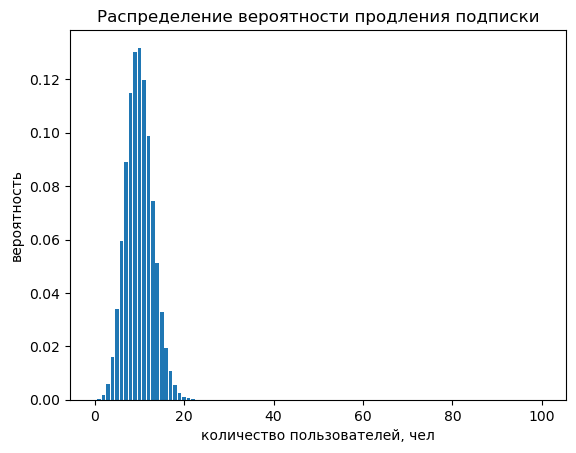

In [47]:
from math import factorial
p = 0.1
n_users = 100
distr = []

for k in range(0, n_users + 1):
    choose = factorial(n_users) / (factorial(k) * factorial(n_users - k))
    prob = choose * p ** k * (1 - p) ** (n_users - k)
    distr.append(prob)
    
plt.bar(range(0, n_users + 1), distr)
plt.title('Распределение вероятности продления подписки')
plt.xlabel('количество пользователей, чел')
plt.ylabel('вероятность');

С помощью метода cdf() подберем необходимое количество промокодов.

In [48]:
from math import sqrt
from scipy import stats as st

n_users = 1169 
p = 0.1

mu = n_users * p 
sigma = sqrt(n_users * p * (1 - p))

distr = st.norm(mu, sigma)

result = distr.cdf(100)
print(1-result)

0.9502851068730583


1169 промокодов - минимальное количество промокодов, которое необходимо разослать, чтобы вероятность невыполнения плана была не более 5%.

Планируется разослать 1 000 000 уведомлений. <br>
Вероятность открытия уведомления составляет 40%. <br>
Какова вероятность того, что уведомления откроют не более 399 500 человек (то есть менее 399 500)?

С помощью метода cdf() посчитаем вероятность.

In [49]:
n = 1000000
p = 0.4

mu = n * p
sigma = sqrt(n * p * (1 - p))

distr = st.norm(mu, sigma) 

result =1- distr.cdf(399500)
print(result)

0.8462829170363023


Вероятность получить менее 399500 открытий уведомлений равна ~ 15.37%.

**Выводы.<br>
На основании проведенного анализа данных можно определить портрет пользователя сервиса проката самокатов. <br>
Основная группа пользователей - люди в возрасте от 20 до 30 лет, проживающие в крупных городах нашей страны. <br>
Количество пользователей без подписки превышает количество пользователей с подпиской, однако это преимущество сложно назвать подавляющим. <br>
При этом пользователи без подписки совершают вдвое больше поездок (11568 проти 6500). <br>
Средние длительность и дальность поездок пользователей с подпиской выше, чем аналогичные показатели у пользователей без подписки (расстояние - 3115,4 и 3045,5 м соответсвенно; время - 18,5 и 17,4 минут соответственно).<br>
Среднемесячная выручка пользователей с подпиской выше, чем у пользователей без подписки (362 и 328 рублей соответственно).<br>
Однако общая выручка за год пользователей без подписки на 35% превышает общую выручку пользователей с подпиской.<br>
Руководству сервиса проката самокатов стоит рассмотреть возможности расширения сегмента пользователей с подпиской, так как их средняя выручка выше.<br>
Кроме того, стоит рассмотреть возможности расширения срвиса в столицах страны - на данный момент они не являются лидерами по встречаемости в данных. При этом в столицах проживает наибольшее количество людей, наблюдаются постоянные пробки и платежеспособность людей самая высокая.<br>
Также стоит обратить внимание на крупные города, в которых нет метро - такие, как Омск, так как в них низкая вариативность общественного транспорта и как следствие низкая транспортная доступнось.**